In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
#df = pd.read_csv("gapminder.csv")
df = pd.read_csv("../../data/gm_2008_region.csv")

# Create arrays for features and target variable
y = df["life"]
X = df["fertility"]

# Print the dimensions of y and X before reshaping
print("Dimensions of y before reshaping: ", y.shape)
print("Dimensions of X before reshaping: ", X.shape)

# Reshape X and y
y_reshaped = np.reshape(y, (-1, 1))
X_reshaped = np.reshape(X, (-1, 1))

# Print the dimensions of y_reshaped and X_reshaped
print("Dimensions of y after reshaping: ", y_reshaped.shape)
print("Dimensions of X after reshaping: ", X_reshaped.shape)

Dimensions of y before reshaping:  (139,)
Dimensions of X before reshaping:  (139,)
Dimensions of y after reshaping:  (139, 1)
Dimensions of X after reshaping:  (139, 1)


<Axes: >

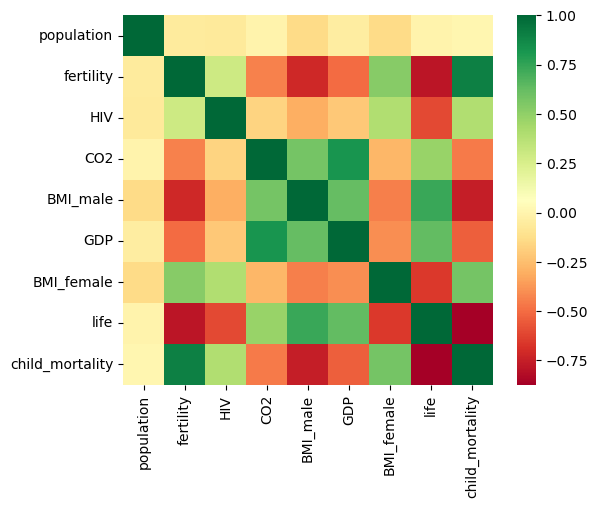

In [9]:
df2 = df[["population", "fertility", "HIV", "CO2", "BMI_male", "GDP", "BMI_female", "life", "child_mortality"]]
sns.heatmap(df2.corr(), square=True, cmap='RdYlGn')

In [10]:
X_fertility = np.reshape(df[["fertility"]], (-1, 1))
y = np.reshape(df[["life"]], (-1, 1))

0.6192442167740035


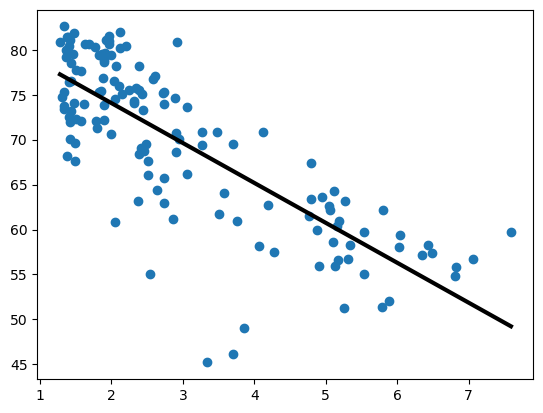

In [13]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

## Added so that we can see all of the points, that we otherwise wouldn't
##     get to see
plt.scatter(X_fertility, y)
## ---- End Insertion ----

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

In [14]:
X = np.reshape(df[["fertility"]], (-1, 1))
y = np.reshape(df[["life"]], (-1, 1))

In [15]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7298987360907494
Root Mean Squared Error: 4.194027914110243


In [16]:
## CROSS VALIDATION

In [18]:
X = np.reshape(df[["population", "fertility", "HIV", "CO2", "BMI_male", "GDP", "BMI_female", "child_mortality"]], (-1, 8))
y = np.reshape(df[["life"]], (-1, 1))

print(X)

[[3.4811059e+07 2.7300000e+00 1.0000000e-01 ... 1.2314000e+04
  1.2990490e+02 2.9500000e+01]
 [1.9842251e+07 6.4300000e+00 2.0000000e+00 ... 7.1030000e+03
  1.3012470e+02 1.9200000e+02]
 [4.0381860e+07 2.2400000e+00 5.0000000e-01 ... 1.4646000e+04
  1.1889150e+02 1.5400000e+01]
 ...
 [8.6589342e+07 1.8600000e+00 4.0000000e-01 ... 4.0850000e+03
  1.2193670e+02 2.6200000e+01]
 [1.3114579e+07 5.8800000e+00 1.3600000e+01 ... 3.0390000e+03
  1.3244930e+02 9.4900000e+01]
 [1.3495462e+07 3.8500000e+00 1.5100000e+01 ... 1.2860000e+03
  1.3197450e+02 9.8300000e+01]]


In [19]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793223


In [20]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))

0.8718712782622107
0.8436128620131196


In [24]:
## REGULARIZED REGRESSION
df_columns = ["population", "fertility", "HIV", "CO2", "BMI_male", "GDP", "BMI_female", "child_mortality"]
X = np.reshape(df[df_columns], (-1, 8))
y = np.reshape(df[["life"]], (-1, 1))


[-1.47260906e-09 -0.00000000e+00 -5.69102627e-01 -1.55747261e-01
  1.28244019e-01  1.35109382e-04 -2.29669866e-01 -1.13689989e-01]


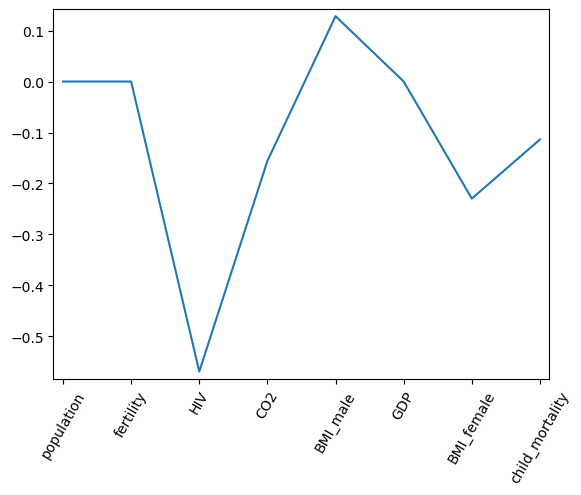

In [29]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
#lasso = Lasso(alpha=0.4, normalize=True) # Lasso doesn't seem to have this feature anymore
lasso = Lasso(alpha=0.4)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
#plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.xticks(range(len(df_columns)), df_columns, rotation=60)
plt.margins(0.02)
plt.show()

In [32]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

In [34]:
## These ass-hats didn't explain their data, so I have no f'ing idea what their data should look like,
##    Good job data-camp

/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.81411e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.07365e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.03536e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.91019e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

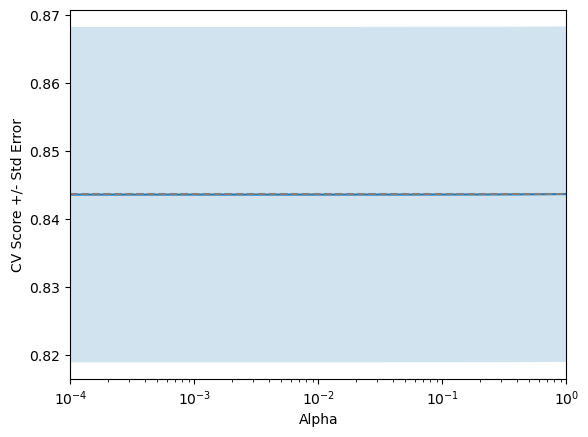

In [33]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
#ridge = Ridge(normalize=True) # Again this feature has been disabled
ridge = Ridge()

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)
